In [1]:
%matplotlib widget

In [2]:
import numpy as np
import pygimli as pg
import empymod as ep
from scipy.constants import mu_0
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import root_mean_squared_error
import pandas as pd
import sys
sys.path.insert(1, '../src')

from FDEM1D import FDEM1DModelling_field, LCModelling
from showStitched import showStitchedModels
from Plots import Plot2Datas_field, grid

In [3]:
# First step: check configuration of FDEM to perform forward
# Second step: check number of layers in FDEM1D Modelling forward class

In [4]:
#models = np.load('models/model_slope5.npy')
data = np.load('field_data/Dualem_data/LineEMIERT1.npy', allow_pickle=True)
data = np.array(data)

In [36]:
pos = len(data)
x = np.linspace(0, 36, pos)
x

array([ 0.        ,  0.87804878,  1.75609756,  2.63414634,  3.51219512,
        4.3902439 ,  5.26829268,  6.14634146,  7.02439024,  7.90243902,
        8.7804878 ,  9.65853659, 10.53658537, 11.41463415, 12.29268293,
       13.17073171, 14.04878049, 14.92682927, 15.80487805, 16.68292683,
       17.56097561, 18.43902439, 19.31707317, 20.19512195, 21.07317073,
       21.95121951, 22.82926829, 23.70731707, 24.58536585, 25.46341463,
       26.34146341, 27.2195122 , 28.09756098, 28.97560976, 29.85365854,
       30.73170732, 31.6097561 , 32.48780488, 33.36585366, 34.24390244,
       35.12195122, 36.        ])

In [6]:
data_t = data.copy()

In [7]:
nLayers = 2

# Inversion

In [8]:
# Initial model
m0 = np.zeros((pos,3))

# 2 lay case
m0[:,:1] = 2
m0[:,1:] = 500/1000

m0_rav = m0.ravel()

In [9]:
np.shape(m0)

(42, 3)

### L-curve criterion

In [10]:
lambdas = np.logspace(0,3,10, endpoint=False)
lambdas

array([  1.        ,   1.99526231,   3.98107171,   7.94328235,
        15.84893192,  31.6227766 ,  63.09573445, 125.89254118,
       251.18864315, 501.18723363])

RUNNING L CURVE CRITERION 
Now using LAMBDA 0.1 - 0 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:53:57 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:53:57 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd723dd0>
Now using LAMBDA 0.14384498882876628 - 1 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:00 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:00 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd58f1a0>
Now using LAMBDA 0.20691380811147897 - 2 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:02 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:03 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd58f6a0>
Now using LAMBDA 0.29763514416313175 - 3 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:05 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:05 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd58e2f0>
Now using LAMBDA 0.42813323987193935 - 4 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:08 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:08 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bdff29d0>
Now using LAMBDA 0.6158482110660264 - 5 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:11 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:11 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd58fce0>
Now using LAMBDA 0.8858667904100825 - 6 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:14 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:14 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd723f60>
Now using LAMBDA 1.2742749857031335 - 7 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:17 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:17 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd59cfe0>
Now using LAMBDA 1.8329807108324356 - 8 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:19 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:19 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd58d4e0>
Now using LAMBDA 2.636650898730358 - 9 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:22 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:22 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd58ef70>
Now using LAMBDA 3.79269019073225 - 10 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:24 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:24 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd58e110>
Now using LAMBDA 5.455594781168517 - 11 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:27 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:27 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bdfbcc70>
Now using LAMBDA 7.847599703514611 - 12 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:29 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:30 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd59ea20>
Now using LAMBDA 11.288378916846883 - 13 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:32 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:32 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd59c860>
Now using LAMBDA 16.23776739188721 - 14 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:35 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:35 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd59d120>
Now using LAMBDA 23.357214690901213 - 15 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:37 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:37 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bdff09f0>
Now using LAMBDA 33.59818286283781 - 16 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:40 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:40 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd59fd80>
Now using LAMBDA 48.32930238571752 - 17 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:42 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:42 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd59d850>
Now using LAMBDA 69.51927961775606 - 18 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:44 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:44 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd58f1a0>
Now using LAMBDA 100.0 - 19 ITERATION 
Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:54:47 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:54:47 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90bd58f6a0>
Elapsed time is 52.17 seconds.
The optimal alpha =  1.2742749857031335


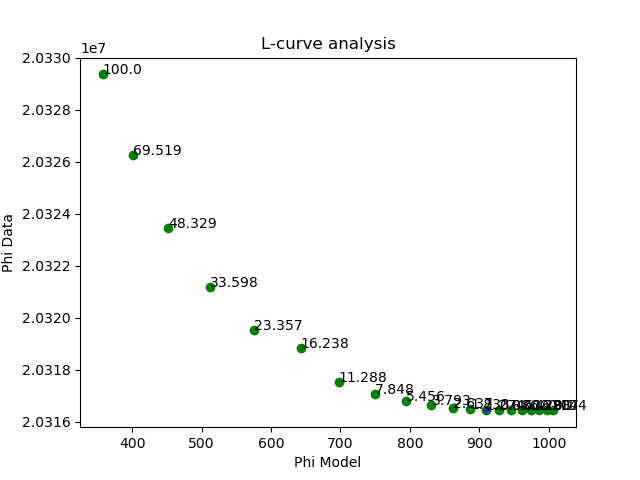

In [11]:
Lcurve = True

if Lcurve:
    # ertmanager.inv.phiModel() #x
    # ertmanager.inv.phiData() #y 
    #do it with the inverse of lambda? 
    print('RUNNING L CURVE CRITERION ')
    lambdas = np.logspace(-1,2,20)
        
    phimodels = []
    phidatas = []
    chis = []
    mods = {}

    pg.tic()
    for i, a in enumerate(lambdas):
        print(f'Now using LAMBDA {a} - {i} ITERATION ')
        LC = LCModelling(FDEM1DModelling_field)
        LC.initJacobian(dataVals=data_t, nLay=nLayers)
        LC.createJacobian(m0)
        LC.constraint_matrix(data_t, nLay=nLayers)
        LC.normalization(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
        LC.createWeight(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
        LC.createConstraints()
        
        transData = pg.trans.TransLog()
        transThk = pg.trans.TransLogLU(0.1,3)
        transSig = pg.trans.TransLogLU(2/1000,2000/1000)

        LC.region(1).setTransModel(transThk)
        LC.region(2).setTransModel(transSig)

        data_true = np.array(data_t).ravel()
        relativeError = np.ones_like(data_true)*1e-3 # what is this for?

        inv = pg.Inversion(LC)
        inv.dataTrans = transData
        mod = inv.run(data_true, relativeError, startModel=m0_rav, verbose=False, lam=a)
        phimodels.append(inv.phiModel())
        phidatas.append(inv.phiData())
        chis.append(inv.chi2())
        mods[a] = mod
    pg.toc()

    #first derivatives 
    dx= np.gradient(phimodels)
    dy = np.gradient(phidatas)

    #second derivatives 
    d2x = np.gradient(dx)
    d2y = np.gradient(dy)

    #calculation of curvature from the typical formula
    curvature = np.abs(dx * d2y - d2x * dy) / (dx * dx + dy * dy)**1.5
    print("The optimal alpha = ", lambdas[np.argmax(curvature)+1])

    plt.figure()
    plt.scatter(phimodels, phidatas, c='g')
    plt.xlabel('Phi Model')
    plt.ylabel('Phi Data')
    plt.title('L-curve analysis')
    for i, txt in enumerate(lambdas):
         txt = np.round(txt, 3)
         txt = str(txt)
         plt.annotate(txt, (phimodels[i], phidatas[i]))
    plt.plot(phimodels[np.argmax(curvature)+1], phidatas[np.argmax(curvature)+1], '+b')
    #plt.savefig(PATHPLOTS + 'Lcurveplot.jpg')
    plt.show()

    lamb_opt = lambdas[np.argmax(curvature)+1]

In [12]:
lamb_opt = lambdas[np.argmax(curvature)+1]

In [17]:
LC = LCModelling(FDEM1DModelling_field)
LC.initJacobian(dataVals=data_t, nLay=nLayers)
LC.createJacobian(m0)
LC.constraint_matrix(data_t, nLay=nLayers)
LC.normalization(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
LC.createWeight(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
LC.createConstraints()

transData = pg.trans.TransLog()
transThk = pg.trans.TransLogLU(0.1,3)
transSig = pg.trans.TransLogLU(2/1000,2500/1000)

LC.region(1).setTransModel(transThk)
LC.region(2).setTransModel(transSig)

data_true = np.array(data_t).ravel()
relativeError = np.ones_like(data_true)*1e-3 # what is this for?

inv = pg.Inversion(LC)
inv.dataTrans = transData
models_est = inv.run(data_true, relativeError, startModel=m0_rav, verbose=False, lam=lamb_opt)

Inversion is normalized
Jacobian size: 492 123 504


21/04/24 - 17:57:07 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 17:57:07 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 123
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7f90ae32cea0>


In [18]:
models_est = np.array(models_est).reshape(np.shape(m0))

#models_grid = grid(models)
#models_est_grid = grid(models_est)
#diff = 100*np.abs(models_grid - models_est_grid)/models_grid

In [142]:
pos = len(models_est)
x =  np.linspace(0,36,pos, endpoint=False)
boundary = np.array([x, -models_est[:,0]]).T

np.save('models/boundary_est', boundary)

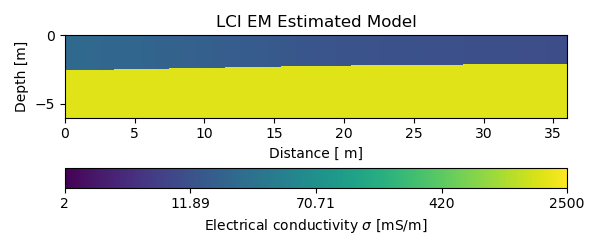

In [141]:
fig, ax = plt.subplots(figsize=(6,2.5))

models_mS = models_est.copy()
models_mS[:,1:] = models_mS[:,1:]*1000

inputs ={'label' : 'Electrical conductivity $\sigma$ [mS/m]',
         'cMin': 2,
         'cMax': 2500, 
         'logScale':True, 
         'location':'right'}

showStitchedModels(ax = ax, models=models_mS, zMax=6, 
                  title = 'LCI EM Estimated Model', **inputs)

ax.set_ylabel('Depth [m]')
ax.set_xlim([0,36])
ax.set_xlabel('Distance [ m]')

#rmse = root_mean_squared_error(models.ravel(), models_est.ravel())

#ax.text(0, -5, 'RMSE: ' + "{:1.2f}".format(rmse), fontsize='small')

plt.tight_layout()

In [124]:
def Plot2Datas_field(data_1D, data_3D):

    fig, ax = plt.subplots(2,2,)

    ax[0,0].semilogy(x,data_1D[:,0], '.b', label='HCP2')
    ax[0,0].semilogy(x,data_3D[:,0], 'xb' )
    ax[0,0].semilogy(x,data_1D[:,1], '.k', label = 'HCP4')
    ax[0,0].semilogy(x,data_3D[:,1], 'xk')
    ax[0,0].semilogy(x,data_1D[:,2], '.r', label= 'HCP8')
    ax[0,0].semilogy(x,data_3D[:,2], 'xr' )
    #ax[0,0].legend(fontsize=7)
    ax[0,0].set_title('Quadrature HCP')
    ax[0,0].set_ylabel('Quadrature [ppt]', fontsize=7)
    ax[0,0].set_ylim([1, 1e3])
    ax00 =ax[0,0].twinx()

    ax00.semilogy(x,100*np.abs((data_1D[:,0]-data_3D[:,0])/data_3D[:,0]), ':b', label='HCP2 Diff')
    ax00.semilogy(x,100*np.abs((data_1D[:,1]-data_3D[:,1])/data_3D[:,1]), ':k', label='HCP4 Diff')
    ax00.semilogy(x,100*np.abs((data_1D[:,2]-data_3D[:,2])/data_3D[:,2]), ':r', label='HCP8 Diff')
    ax00.set_ylim([1e-2, 3e1])
   # ax[0,0].legend(fontsize=7)
    ax00.set_ylabel('% Rel Difference', fontsize=7)
    ax[0,0].tick_params(labelsize=7)
    ax00.tick_params(labelsize=7)

    ax[1,0].semilogy(x,data_1D[:,3], '.b', label='PRP2 ')
    ax[1,0].semilogy(x,data_3D[:,3], 'xb' )
    ax[1,0].semilogy(x,data_1D[:,4], '.k', label = 'PRP4')
    ax[1,0].semilogy(x,data_3D[:,4], 'xk' )
    ax[1,0].semilogy(x,data_1D[:,5], '.r', label= 'PRP8')
    ax[1,0].semilogy(x,data_3D[:,5], 'xr')
    ax[1,0].set_title('Quadrature PRP')
    ax[1,0].set_ylabel('Quadrature [ppt]', fontsize=7)
    ax[1,0].set_ylim([1, 1e3])
    #ax[1,0].legend(fontsize=7)
    ax[1,0].set_xlabel('Distance [m]', fontsize=7)
    ax10 = ax[1,0].twinx()

    ax10.semilogy(x,100*np.abs((data_1D[:,3]-data_3D[:,3])/data_3D[:,3]), 'b:', label='PRP2 Diff')
    ax10.semilogy(x,100*np.abs((data_1D[:,4]-data_3D[:,4])/data_3D[:,4]), ':k', label='PRP4 Diff')
    ax10.semilogy(x,100*np.abs((data_1D[:,5]-data_3D[:,5])/data_3D[:,5]), ':r', label='PRP8 Diff')
  #  ax[1,0].legend(fontsize=7)
    ax10.set_ylim([1e-2, 3e1])
    ax10.set_ylabel('% Rel Difference', fontsize=7)
    ax[1,0].tick_params(labelsize=7)
    ax10.tick_params(labelsize=7)

    ax[0,1].semilogy(x,data_1D[:,6], '.b', label='HCP2 True')
    ax[0,1].semilogy(x,data_3D[:,6], 'xb' , label='HCP2 Est')
    ax[0,1].semilogy(x,data_1D[:,7], '.k', label = 'HCP4 True')
    ax[0,1].semilogy(x,data_3D[:,7], 'xk' , label = 'HCP4 Est')
    ax[0,1].semilogy(x,data_1D[:,8], '.r', label= 'HCP8 True')
    ax[0,1].semilogy(x,data_3D[:,8], 'xr' , label= 'HCP8 Est')
    
    ax[0,1].set_title('In Phase HCP')
    ax[0,1].set_ylabel('In Phase [ppt]', fontsize=7)
    ax[0,1].set_ylim([1, 1e3])
    ax01 = ax[0,1].twinx()

    ax01.semilogy(x,100*np.abs((data_1D[:,6]-data_3D[:,6])/data_3D[:,6]), ':b', label = 'HCP2 Diff')
    ax01.semilogy(x,100*np.abs((data_1D[:,7]-data_3D[:,7])/data_3D[:,7]), ':k', label = 'HCP4 Diff')
    ax01.semilogy(x,100*np.abs((data_1D[:,8]-data_3D[:,8])/data_3D[:,8]), ':r', label = 'HCP8 Diff')
    ax[0,1].legend(fontsize=7, bbox_to_anchor=(1.3,0.8))
    ax01.legend(fontsize=7, bbox_to_anchor=(1.3,1.1))
    ax01.set_ylim([1e-2, 3e1])
    ax01.set_ylabel('% Rel Difference', fontsize=7)
    ax[0,1].tick_params(labelsize=7)
    ax01.tick_params(labelsize=7)


    ax[1,1].semilogy(x,data_1D[:,9], '.b', label='PRP2 True')
    ax[1,1].semilogy(x,data_3D[:,9], 'xb', label='PRP2 Est' )
    ax[1,1].semilogy(x,data_1D[:,10], '.k', label = 'PRP4 True')
    ax[1,1].semilogy(x,data_3D[:,10], 'xk', label='PRP4 Est' )
    ax[1,1].semilogy(x,data_1D[:,11], '.r', label= 'PRP8 True')
    ax[1,1].semilogy(x,data_3D[:,11], 'xr', label='PRP8 Est' )
    ax[1,1].set_title('In Phase PRP')
    ax[1,1].set_ylabel('In Phase [ppt]', fontsize=7)
    ax[1,1].set_ylim([1, 1e3])
    #ax[1,1].legend(fontsize=7)
    ax11 = ax[1,1].twinx()

    ax11.semilogy(x,100*np.abs((data_1D[:,9]-data_3D[:,9])/data_3D[:,9]), ':b', label = 'PRP2 Diff')
    ax11.semilogy(x,100*np.abs((data_1D[:,10]-data_3D[:,10])/data_3D[:,10]), ':k', label = 'PRP4 Diff')
    ax11.semilogy(x,100*np.abs((data_1D[:,11]-data_3D[:,11])/data_3D[:,11]), ':r', label = 'PRP8 Diff')
    ax11.legend(fontsize=7, bbox_to_anchor=(1.3,1.1))
    ax[1,1].legend(fontsize=7, bbox_to_anchor=(1.3,0.8))
    ax[1,1].set_xlabel('Distance [m]', fontsize=7)
    ax11.set_ylim([1e-2, 3e1])
    ax11.set_ylabel('% Rel Difference', fontsize=7)
    plt.tight_layout()
    ax[1,1].tick_params(labelsize=7)
    ax11.tick_params(labelsize=7)

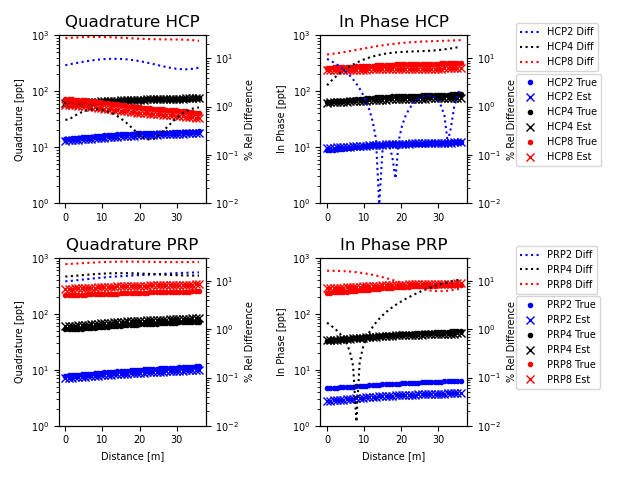

In [125]:
# True data vs Inverted data

data_inv = np.array(inv.response)
data_inv = data_inv.reshape(np.shape(data_t))

Plot2Datas_field(data_t*1000, data_inv*1000)

### 